In [1]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

### Arbeidskrav 3

1. Tegn inn tilbudsfunksjon uten mva (t=0), og forklar hvorfor tilbudsfunksjonen med mva har brattere helning.
2. Beregn likevektspris og -kvantum uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten fra mva, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?



Etterspørsel: 

\begin{equation}
   x^{D}= a - b p_k\tag{1}
\end{equation}

Tilbud:

\begin{equation}
   x^{S}= -A + B p_s\tag{2}
\end{equation}

a, A, b, B er alle poitive tall. $ p_k$ er hva hotelgjester betaler og $p_s$ er hva selgerne får. $p_s$ er gitt ved å ta $p_k$ minus mva medverdiavgift $tp_k$. Det kan gis ved $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen.

Tilbud:

\begin{equation}
   x^{S}= -A + B p_k(1-t)\tag{3}
\end{equation}

## Oppgave 1
### Tegn inn tilbudsfunksjon uten mva (t=0), og forklar hvorfor tilbudsfunksjonen med mva har brattere helning.


Det første jeg gjør er å ta koden fra filen analyse_mva-chechkpoint.ipynb som er et vedlegg til seminar 5. Dette gjorde jeg siden siden det ville være enklere å bruke seminarskoden som en basis når verdiene for a,A,b,B allerede ble ettablert. Det gjør som at jeg bare kan bygge på koden som ble skrevet før meg for å gjøre oppgaven.

Man måtte "kalibrere" modellen for å finne likevekten til verdiene a,A,b,B når $x = 187000$, $p = 1000$ og $t = 0.12$

Vi endte opp med å få formlene

\begin{equation}
   A=-880B-187000, a=1000b+187000
\end{equation}

Deretter måtte vi finne parametrene for a,A,b,B for at formlene skal gå opp. Her tokk jeg verdiene fram seminar 5 vedlegget og får:

$a=287000, b=100, A=33000, B=250$

Disse parametrene blir delt på 1000 sånn at verdiene telles i tusener og gjør som at tallene ikke blir for lange.

Med disse variablene blir formlene:

\begin{equation}
   x^{D}= 287 - 0.1 * p
\end{equation}

og

\begin{equation}
   x^{S}= -33 + 0.25 * p (1 - 0.12)
\end{equation}


Her lager jeg funksjonenen men jeg modifiserte etterspørselsfunksjonen sånn at jeg kan endre verdien på T hvis jeg ønsker å illustrere en etterspørsels graf med mva.

In [2]:
def x_d(p):              
    return 287 - 0.1*p #etterspørsel

def x_s(p,t):
    return -33+0.25*p*(1-t) #tilbud


Her legger jeg til den nye tilbudsfunksjonen og tegner figuren

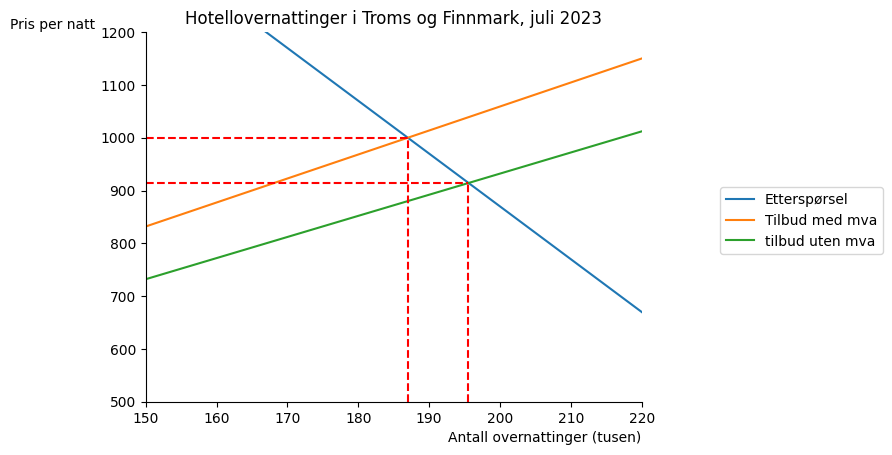

In [3]:
# vi lager en figur

p_num=np.linspace(0.1,1500,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per natt', loc='top', rotation = 0)
                ax.set_xlabel('Antall overnattinger (tusen)', loc='right')
                ax.set(xlim=(150,220))
                ax.set(ylim=(500,1200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig1, ax1 = create_ax()

# plott funksjonene

ax1.plot(x_d(p_num),p_num, label='Etterspørsel')

ax1.plot(x_s(p_num, 0.12),p_num, label='Tilbud med mva')

ax1.plot(x_s(p_num, 0), p_num, label='tilbud uten mva')

ax1.hlines(1000, 150, 187, 'r', linestyles='dashed')
ax1.vlines(187, 500, 1000, 'r', linestyles = 'dashed')

ax1.hlines(914, 150, 195.5, 'r', linestyles='dashed')
ax1.vlines(195.5, 500, 914, 'r', linestyles = 'dashed')

ax1.set_title('Hotellovernattinger i Troms og Finnmark, juli 2023')

ax1.legend(bbox_to_anchor=(1.5,0.6));

Som vi ser så har tilbudsfunksjonen med mva en brattere helning. Grunnen til at funksjonen med mva er brattere er fordi den funksjonen tar i hensyn til prisen til selve produktet samtidig som den også teller kostnaden til mva. Funksjonen uten mva teller bare prisen til selve produktet og ingen andre kostnadder.

## Oppgave 2
### Beregn likevektspris og -kvantum uten mva, og vis disse i figuren.

Her gjør jeg matten men jeg har allerede illustrert det på figuren ovenfor (Oppgave 2). Disse verdiene telles i tusener.

In [4]:
# definer symbolene som vi kommer til å bruke
p=sp.symbols('p', positive=True, real=True)

likevekt_formel =sp.Eq(x_d(p), x_s(p,0))
likevekt_formel

likevekt_pris = sp.solve(likevekt_formel, p)

print("Likevekt når p =", round(likevekt_pris[0], 2))

print("Det er likevekt i x_s =", round(x_s(likevekt_pris[0],0), 2))


Likevekt når p = 914.29
Det er likevekt i x_s = 195.57


## Oppgave 3
### Beregn og vis inntekten til staten fra mva, og andelen som betales av konsumenter og produsenter.

Nå må vi kalibrere funksjonene for å finne betingelsene til å oppnå likevekt

In [5]:
x,p,t=sp.symbols('x p t', positive=True, real=True)

eq_cond=sp.Eq(x_d(p),x_s(p,t)) #betingelse for likevekt
eq_cond

Eq(287 - 0.1*p, 0.25*p*(1 - t) - 33)

### Etter å ha funnet betingelsen for å få likevekt mellom funksjonene så kan jeg løse for p:

In [6]:
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-6400.0/(5.0*t - 7.0)

### Når jeg har funnet p kan jeg løse for kvantum

In [7]:
x_eq=x_s(p_eq[0],t)
x_eq

-1600.0*(1 - t)/(5.0*t - 7.0) - 33

### Finner likevektspris som funksjon av t

In [8]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t

p_eq_fn=sp.lambdify(t, p_eq[0])

p_eq_fn(t)

-6400.0/(5.0*t - 7.0)

### Finner likevektskvantum som en funksjon av t

In [9]:
x_eq_fn = sp.lambdify(t, x_eq)

x_eq_fn(t)

-33 + (1600.0*t - 1600.0)/(5.0*t - 7.0)

### Kvantum når tilbudsfunksjonen har mva t = 0.12

In [10]:
x_eq_fn(0.12)

187.0

### Prisen når konsumenten må betale med mva t = 0.12

In [11]:
p_kons = round(p_eq_fn(0.12),2)
p_kons

1000.0

### Prisen produsenten får

In [12]:
p_kons * (1-0.12)

880.0

### Tegner likevekt med avgift

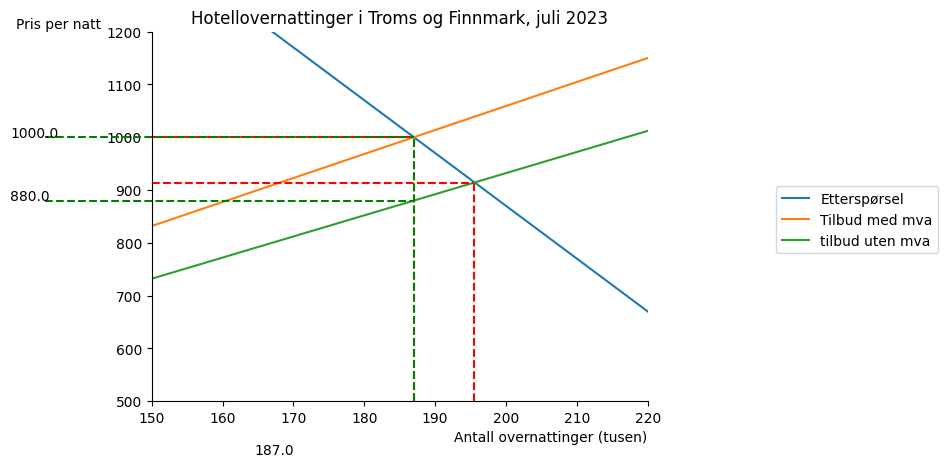

In [13]:
x_opt = round(x_eq_fn(0.12),2) #runder av til 2 desimaler


ax1.vlines(x_eq_fn(0.12),500, 1000, linestyles='dashed', clip_on=False, color = "green")
ax1.hlines(p_eq_fn(0.12),135,187, linestyles='dashed', clip_on=False, color = "green")
ax1.hlines(p_kons * (1-0.12),135,187, linestyles='dashed', clip_on=False, color = "green")

ax1.annotate(x_opt, xy=(x_opt*(1-0.12), 400), annotation_clip=False)
ax1.annotate(p_kons, xy=(130, p_kons), annotation_clip=False)
ax1.annotate(p_kons*(1-0.12), xy=(130, p_kons*(1-0.12)), annotation_clip=False)

ax1.legend(bbox_to_anchor=(1.6,0.6))

fig1

### andel som produsent og kjøperere betaler til avgift

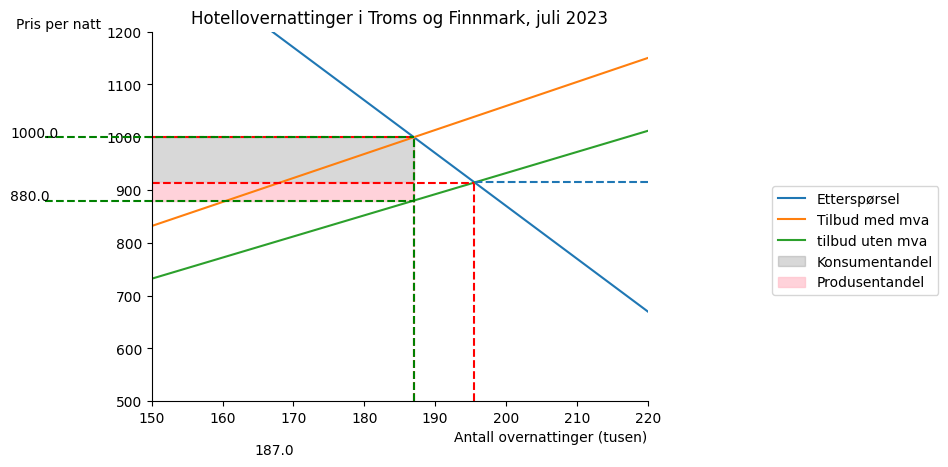

In [14]:
q=np.linspace (150, x_eq_fn(0.12), 100)   #x-verdier for ax.fill


ax1.hlines(p_eq_fn(0),220,x_eq_fn(0), linestyles='dashed')

ax1.fill_between(q,p_kons,p_eq_fn(0), color = "gray", alpha = 0.3, label='Konsumentandel')
ax1.fill_between(q,p_eq_fn(0),p_kons*(1-0.12), color = "pink", alpha = 0.7, label='Produsentandel')

ax1.legend(bbox_to_anchor=(1.6,0.6))
fig1

Som vi ser på figuren ovenfår, så betaler kjøperne størst andel av mva.

In [15]:
produsent_andel_prosent = (34/120) * 100

kjøper_andel_prosent = (86/120) * 100

print("Produsenten betaler",round(produsent_andel_prosent,2), "% av andelen")
print("Kjøperne må betale ",round(kjøper_andel_prosent,2), "% av andelen")


Produsenten betaler 28.33 % av andelen
Kjøperne må betale  71.67 % av andelen


## Oppgave4

Hva er fordeler/ulemper av en mva og en stykkprisavgift?

1. Noen fordeler med mva er at det som regel er en avgift for en type vare. Dette gjør at mva for alkohol for eksempel er en avgift for all alkohol, noe som leder til et stort marked som staten kan få inntekter fra.
2. En annen fordel er at mva er avgifter som kan standariserer for varer og tjenester. Noe som gjør det enkelt for vedlikehold og innsamling av systemet og penger.

3. En ulempe med mva er at det kan øke kostnaden for forbrukerne. Noe som kan påvirke lavinntets hushold spesielt.